## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Exploring Datasets with *pandas*](#0)<br>
1.1 [The Dataset: Immigration to Canada from 1980 to 2013](#2)<br>
1.2 [*pandas* Basics](#4) <br>
1.3 [*pandas* Intermediate: Indexing and Selection](#6) <br>
2. [Visualizing Data using Matplotlib](#8) <br>
2.1 [Matplotlib: Standard Python Visualization Library](#10) <br>
3. [Line Plots](#12)
</div>
<hr>

# Exploring Datasets with *pandas* <a id="0"></a>

*pandas* is an essential data analysis toolkit for Python. From their [website](http://pandas.pydata.org/):
>*pandas* is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, **real world** data analysis in Python.

The course heavily relies on *pandas* for data wrangling, analysis, and visualization. We encourage you to spend some time and  familizare yourself with the *pandas* API Reference: http://pandas.pydata.org/pandas-docs/stable/api.html.

## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the Canadian immigration data.

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod1Fig1-Dataset.png" align="center" width=900>

For sake of simplicity, Canada's immigration data has been extracted and uploaded to one of IBM servers. You can fetch the data from [here](https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx).

---

In [5]:
import pandas as pd
import numpy as np

In [6]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'

In [7]:
df= pd.read_excel(path, sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [8]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

In [262]:
df.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [263]:
df.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [264]:
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [265]:
df.columns.tolist()
print(df.columns.tolist())

['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [266]:
df.index.tolist()
print(type(df.index.tolist()))

<class 'list'>


In [267]:
df.shape

(195, 43)

In [268]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [269]:
df.drop(['AREA', 'Type', 'Coverage', 'REG', 'DEV'], axis=1, inplace=True)

In [270]:
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [271]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:

## Total Sum and Add in New Column 'Total'

In [272]:
df.sum(axis=1)

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Length: 195, dtype: int64

In [273]:
df['Total']=df.sum(axis=1)

In [274]:
df['Total']

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Name: Total, Length: 195, dtype: int64

In [275]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [277]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


---
## *pandas* Intermediate: Indexing and Selection (slicing)<a id="6"></a>


### Select Column
**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.
```python
    df.column_name 
        (returns series)
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']  
        (returns series)
```

```python 
    df[['column 1', 'column 2']] 
        (returns dataframe)
```
---

In [278]:
df.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [279]:
df['Country']

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [280]:
df[['Country',1980, 1981]]

,Country,1980,1981
0,Afghanistan,16,39
1,Albania,1,0
2,Algeria,80,67
3,American Samoa,0,1
4,Andorra,0,0
...,...,...,...
190,Viet Nam,1191,1829
191,Western Sahara,0,0
192,Yemen,1,2
193,Zambia,11,17


## Select row

In [281]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Before we proceed, notice that the defaul index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corressponding index value.

This can be fixed very easily by setting the 'Country' column as the index using set_index() method.

## Change index name

In [282]:
df.set_index('Country', inplace=True)

In [283]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## To Remove name of Index

In [284]:
df.index.name=None

In [285]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [286]:
df.loc['Albania'].head()

Continent               Europe
Region         Southern Europe
DevName      Developed regions
1980                         1
1981                         0
Name: Albania, dtype: object

## Number of immigrant for year '2013'

In [287]:
df.loc['Albania',2013]

603

In [288]:
df.loc['Japan',2013]

982

## Number of immigrant from year 1980 to 1985

In [289]:
df.loc['Japan', [1980, 1981, 1982, 1983,1984, 1985]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

## Convert Column name 1980 to 2013 to string

In [290]:
df.columns=list(map(str, df.columns))

In [291]:
print(type(1984))

<class 'int'>


In [292]:
df.columns.values

array(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype=object)

## Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [293]:
years= list(map(str, range(1980,2014)))

In [294]:
years[0:5]

['1980', '1981', '1982', '1983', '1984']

In [295]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [296]:
condition=df['Continent']=='Asia'

In [297]:
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [298]:
df[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


 ## Let's filter the dataframe to show the data on Asian countries (AreaName = Europe) we can filter with more Continent with same method

In [299]:
E=df['Continent']== 'Europe'

In [300]:
E

Afghanistan       False
Albania            True
Algeria           False
American Samoa    False
Andorra            True
                  ...  
Viet Nam          False
Western Sahara    False
Yemen             False
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool

### we can pass mutliple criteria in the same line. 
### let's filter for AreaNAme = Asia and RegName = Southern Asia

### note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
### don't forget to enclose the two conditions in parentheses

In [172]:
df[(df['Continent']=='Asia') & (df['Region']=='Southern Asia')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [174]:
df[df['Region']=='Southern Asia']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [185]:
print(df.shape)
print(df.columns)
df.head()

(195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Visualization Data Using Matplotlib

In [301]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [302]:
mpl.__version__

'3.1.1'

In [303]:
# Matplotlib style
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [309]:
df.loc['Haiti','1980']

1666

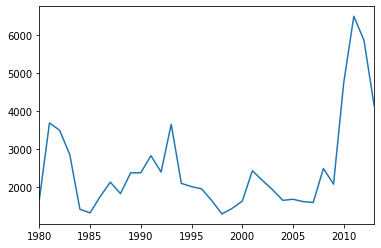

In [310]:
haiti=df.loc['Haiti', years]
haiti.plot()

In [311]:
haiti.index=haiti.index.map(int)

In [312]:
haiti.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

Only accredited educational institutions are eligible for Raytheon's Matching Gifts Program.
For further assistance please contact the program administrator.
1/17/2020 FM

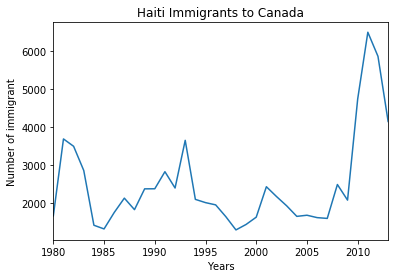

In [330]:
haiti.plot(kind='line')

plt.xlabel('Years')
plt.ylabel('Number of immigrant')
plt.title('Haiti Immigrants to Canada')
plt.show()

We can clearly notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti. Let's annotate this spike in the plot by using the plt.text() method.

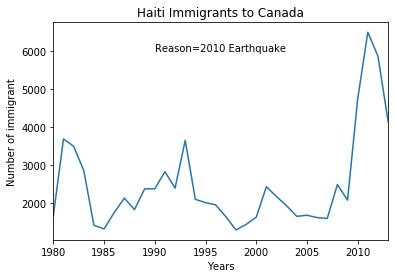

In [339]:
haiti.plot(kind='line')

plt.xlabel('Years')
plt.ylabel('Number of immigrant')
plt.title('Haiti Immigrants to Canada')

plt.text(1990,6000,'Reason=2010 Earthquake')
plt.show()

In [361]:
df.loc['India', range('1980', '2014')]

TypeError: 'str' object cannot be interpreted as an integer

In [362]:
df.loc['India', years]

1980     8880
1981     8670
1982     8147
1983     7338
1984     5704
1985     4211
1986     7150
1987    10189
1988    11522
1989    10343
1990    12041
1991    13734
1992    13673
1993    21496
1994    18620
1995    18489
1996    23859
1997    22268
1998    17241
1999    18974
2000    28572
2001    31223
2002    31889
2003    27155
2004    28235
2005    36210
2006    33848
2007    28742
2008    28261
2009    29456
2010    34235
2011    27509
2012    30933
2013    33087
Name: India, dtype: object

In [376]:
India=df.loc['India', years]
India.head()

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
Name: India, dtype: object

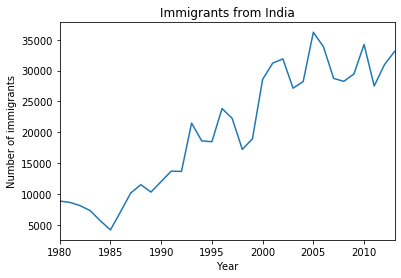

In [393]:
India.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Immigrants from India')

plt.show()

In [380]:
Japan=df.loc['Japan', years]
Japan.head()

1980    701
1981    756
1982    598
1983    309
1984    246
Name: Japan, dtype: object

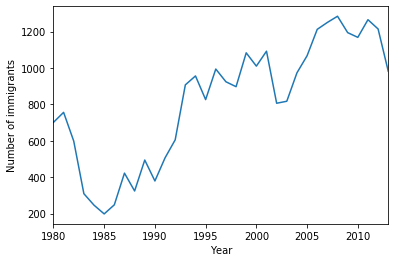

In [394]:
Japan.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of immigrants')

plt.show()

In [398]:
CI=df.loc[['India', 'China'], years]
CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


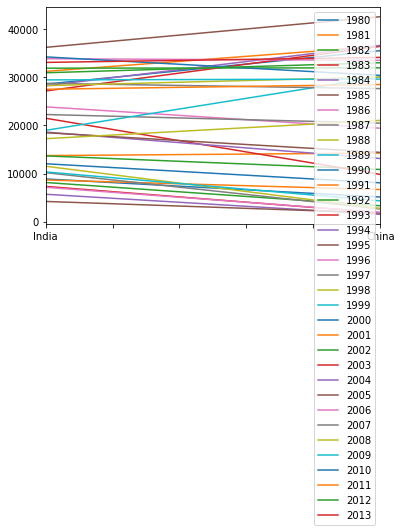

In [400]:
CI.plot(kind='line')

That doesn't look right...

Recall that *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.

In [411]:
CI=CI.transpose()

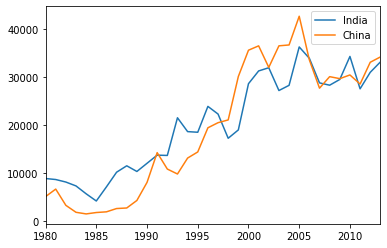

In [403]:
CI.plot()

In [404]:
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [410]:
df['Total'].max()

691904

In [424]:
df5=df['Total'].sort_values(ascending=False)

In [425]:
df5.head()

India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

In [427]:
Top5=df.loc[['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan'], years]

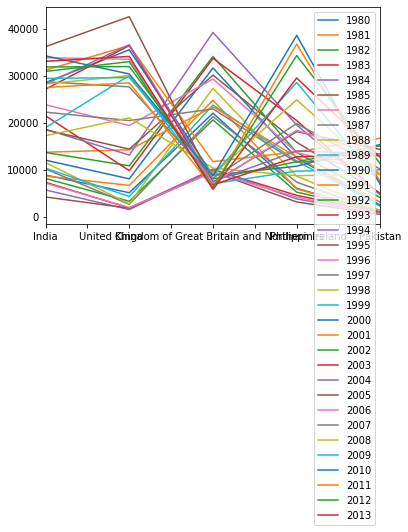

In [429]:
Top5.plot()

In [432]:
Top5=Top5.transpose()

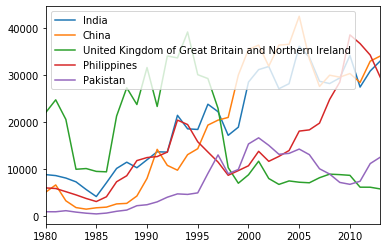

In [435]:
Top5.plot()


### Other Plots

Congratulations! you have learned how to wrangle data with python and create a line plot with Matplotlib. There are many other plotting styles available other than the default Line plot, all of which can be accessed by passing `kind` keyword to `plot()`. The full list of available plots are as follows:

* `bar` for vertical bar plots
* `barh` for horizontal bar plots
* `hist` for histogram
* `box` for boxplot
* `kde` or `density` for density plots
* `area` for area plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

In [98]:
import pandas as pd

In [99]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx'

In [100]:
df=pd.read_excel(path,sheet_name='Canada by Citizenship', skiprows=range(20), skipfotter=2)

In [101]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [102]:
years= list(map(str,range(1984,2014)))

In [103]:
years[0:4]

['1984', '1985', '1986', '1987']

In [104]:
total=df.sum(axis=1)

In [105]:
df.drop(columns=['Type','Coverage'] , inplace=True)

In [106]:
df.head()

,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [107]:
df.rename(columns={'OdName':'Country'}, inplace=True)

In [108]:
df.head()

,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [109]:
df['Total']=df.sum(axis=1)

In [110]:
df.head()

,Country,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
1,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,...,1223,856,702,560,716,561,539,620,603,18433
2,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
3,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,...,0,1,0,0,0,0,0,0,0,2774
4,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [111]:
df.set_index('Country' , inplace=True)

In [112]:
df.head()

,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2774
Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [113]:
df.index.name=None

In [114]:
df.head()

,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,...,1223,856,702,560,716,561,539,620,603,18433
Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,...,0,1,0,0,0,0,0,0,0,2774
Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,...,0,1,1,0,0,0,0,1,1,2749


In [115]:
df.columns=list(map(str,df.columns))

In [116]:
df.columns

Index(['AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [117]:
years= list(map(str,range(1981,20014)))

In [118]:
years[0:5]

['1981', '1982', '1983', '1984', '1985']

In [119]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

In [120]:
Top5=df.head()

In [121]:
Top5

,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Total,999,World,999,World,999,World,143137,128641,121175,89185,...,262242,251640,236753,247244,252170,280687,248748,257903,259021,6927209
India,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,8147,7338,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,699242
China,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,3308,1863,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,662705
United Kingdom of Great Britain and Northern Ireland,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,20620,10015,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233
Unknown,999,World,999,World,999,World,44000,18078,16904,13635,...,4785,4583,4348,4197,3402,3731,2554,1681,1484,518056
